# True Reach Estimator
We are looking to build an estimator around instagram users true reach and impressions. This data is accessible through the business api but in Q1 2018 Instagram blocked influencer marketing teams from this endpoint. We are able to collect a sample of this data to see if there working correlations between currently public data and true reach/impressions.

- Data: the CSV we have contains one year worth of data from 5,000 influencer level Instagram users.

# The goal:
Given the public data points create an accurate estimate of each posts reach and impressions. The ideal would be as accurate as possible, but a 10% range will work for the business.

## Trial 2

Normalizing and scaling by taking the clean data

In [1]:
# import necessary libraries

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests
import re
plt.style.use('seaborn')

In [2]:
# import the clean data file
df = pd.read_csv('clean_instagram.csv')
df.head()

Unnamed: 0  followers                      published  likes  comments  \
0           0      68172  2018-06-18T01:26:44.000+00:00    107         1   
1           1      68172  2018-06-17T18:47:24.000+00:00    323         1   
2           2      68223  2018-06-19T02:24:03.000+00:00     38         1   
3           3      68223  2018-06-18T16:44:25.000+00:00    656        12   
4           4      67812  2018-05-30T03:22:11.000+00:00   2044        26   

   reach  
0   1782  
1   8131  
2    261  
3   9082  
4  85215

In [3]:
# drop the first column which are just the indices
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

followers                      published  likes  comments  reach
0      68172  2018-06-18T01:26:44.000+00:00    107         1   1782
1      68172  2018-06-17T18:47:24.000+00:00    323         1   8131
2      68223  2018-06-19T02:24:03.000+00:00     38         1    261
3      68223  2018-06-18T16:44:25.000+00:00    656        12   9082
4      67812  2018-05-30T03:22:11.000+00:00   2044        26  85215

In [7]:
df.corr()

followers     likes  comments     reach
followers   1.000000  0.688437  0.159002  0.566610
likes       0.688437  1.000000  0.245861  0.780672
comments    0.159002  0.245861  1.000000  0.178898
reach       0.566610  0.780672  0.178898  1.000000

<function pandas.plotting._misc.scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwds)>

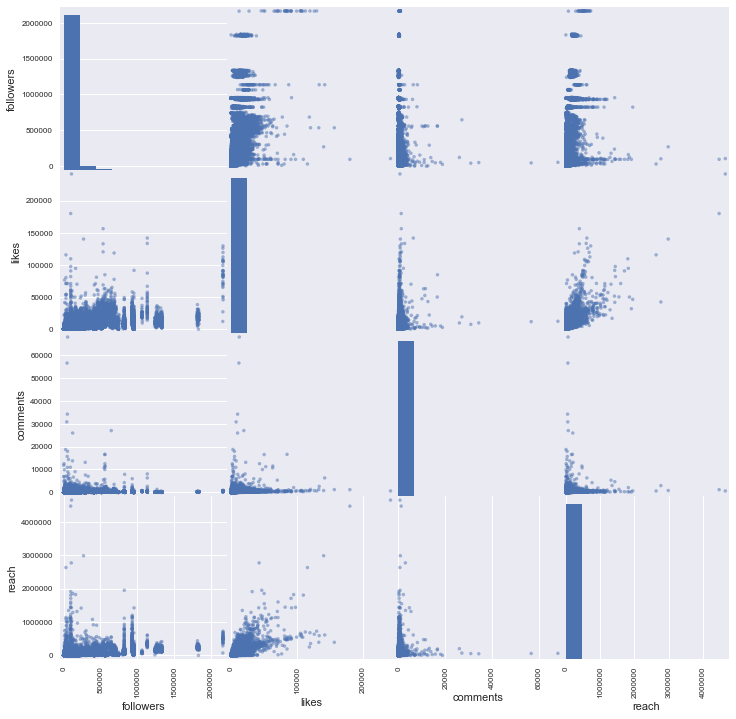

In [4]:
pd.plotting.scatter_matrix(df, figsize  = [12, 12])
pd.scatter_matrix

In [9]:
abs(df.corr()) > 0.8

followers  likes  comments  reach
followers       True  False     False  False
likes          False   True     False  False
comments       False  False      True  False
reach          False  False     False   True

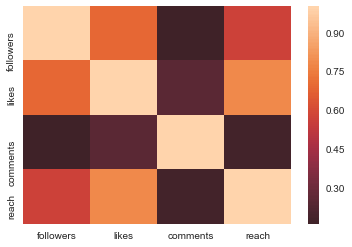

In [10]:
sns.heatmap(df.corr(), center=0);

In [11]:
df.published.min()

'2017-04-18T00:05:43.000+00:00'

In [12]:
df.published.max()

'2018-06-25T20:41:18.000+00:00'

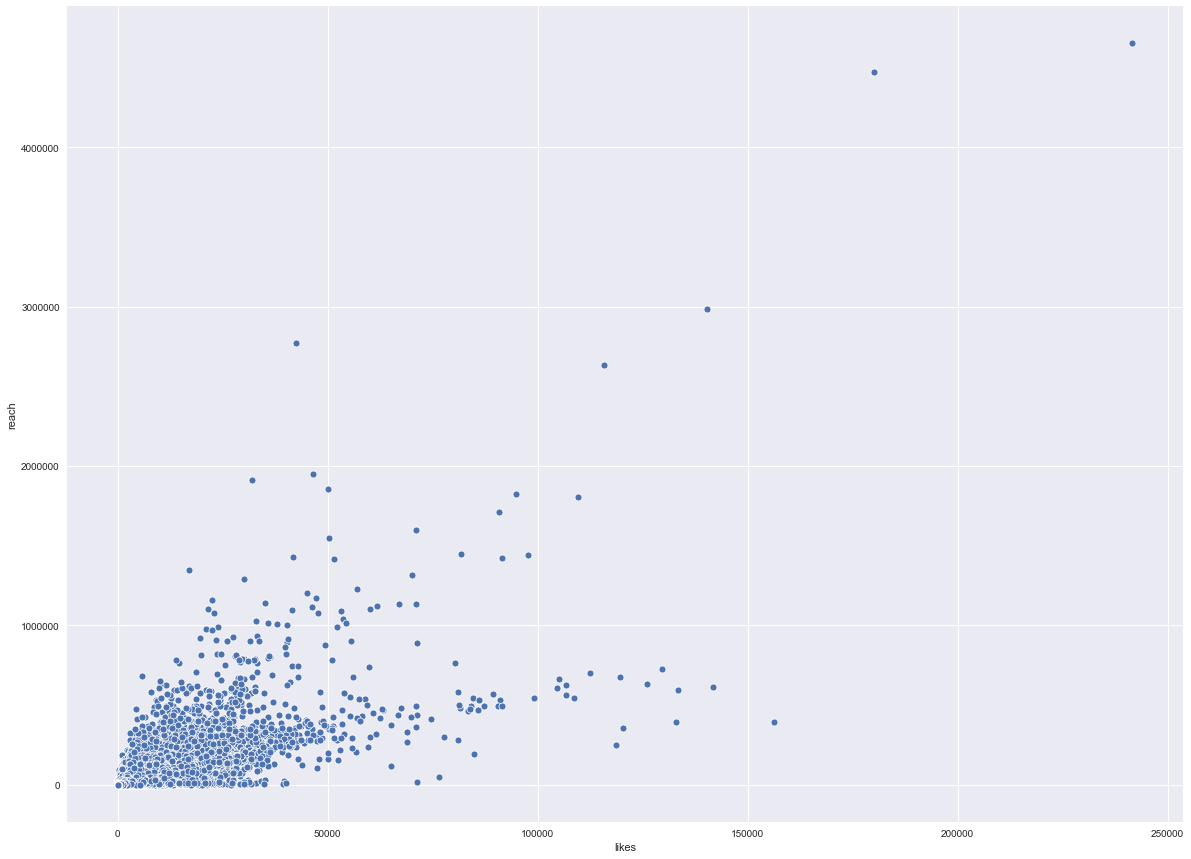

In [33]:
plt.subplots(figsize=(20,15))
sns.scatterplot(df.likes, df.reach)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


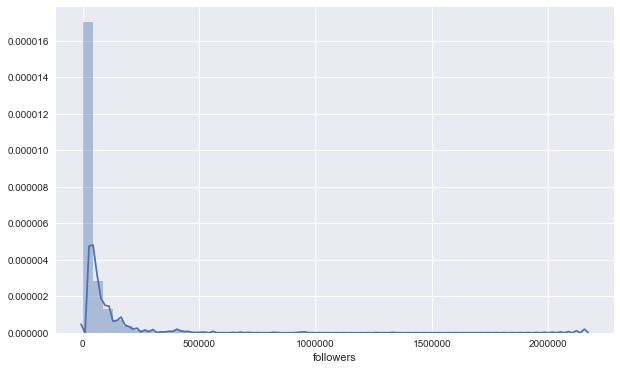

In [100]:
plt.subplots(figsize= (10,6))
sns.distplot(df2.followers)


In [14]:
df.followers.count()

537828

In [16]:
x = df[['followers','likes','comments']]
y = df.reach

In [17]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
clf.coef_

array([ 0.01704961,  8.18486559, -2.06002678])

In [19]:
type(clf)

sklearn.linear_model.base.LinearRegression

In [21]:
lr_model = ols(formula='reach~followers + likes + comments', data=df).fit()

In [22]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  reach   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                 2.819e+05
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:05:22   Log-Likelihood:            -6.0575e+06
No. Observations:              537828   AIC:                         1.212e+07
Df Residuals:                  537824   BIC:                         1.212e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1025.4110     29.028    -35.325      0.000   -1082.305    -968.517
followers      0.0170      0.000     47.073      0.000       0.016       0.018
likes          8.1849      0.013    624.700      0.000       8.159       8.211
comments      -2.0600      0.136    -15.133      0.000      -2.327      -1.793
==============================================================================
Omnibus:                  1462193.000   Durbin-Watson:                   1.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     270864320732.786
Skew:                          33.045   Prob(JB):                         0.00
Kurtosis:                    3479.013   Cond. No.                     1.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Correlation plot')

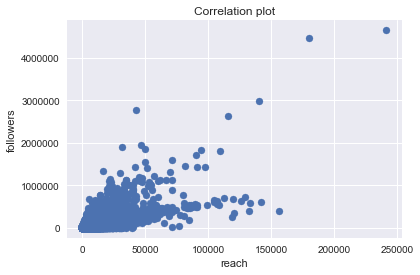

In [23]:
plt.scatter(df.likes, df.reach)

plt.xlabel('reach')
plt.ylabel('followers')
plt.title("Correlation plot")
# what can we say about the correlation between mpg and weight?

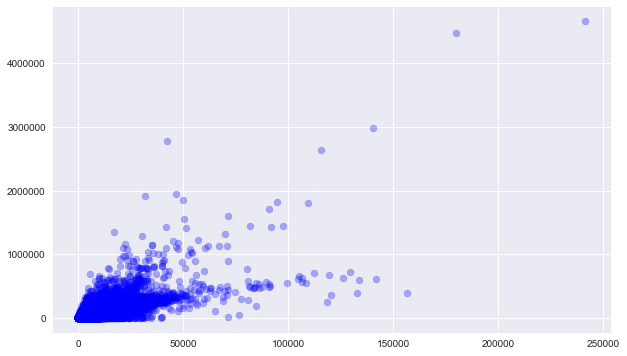

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(df.likes, df.reach,  color='blue', alpha = 0.3, label = 'clear')
plt.show()

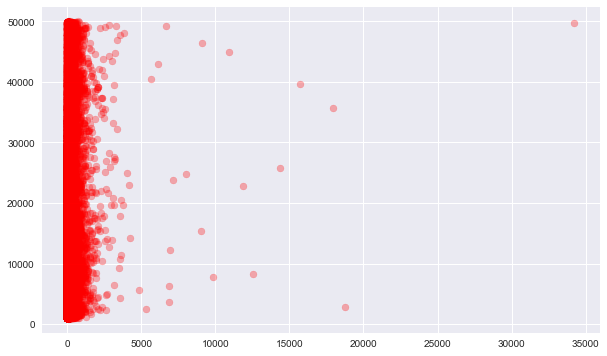

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(df.comments, df.reach,  color='red', alpha = 0.3, label ='mist')
# plt.xlim(0,2000)
# plt.ylim(0,500)
plt.show()

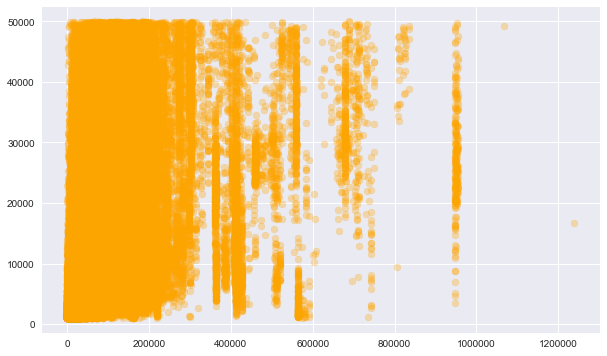

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(x=df.followers, y=df.reach,  color='orange', alpha = 0.3, label = 'snow')
# plt.xlim(0,2000)
# plt.ylim(0,500)
plt.show()

In [52]:
df.loc[(df["likes"] > 1200) & (df["likes"] < 1500)]

followers                      published  likes  comments  reach
5           67838  2018-06-07T20:18:38.000+00:00   1477        63  36095
75          64185  2018-04-30T01:34:47.000+00:00   1359        11  17438
85          45231  2018-01-07T18:12:14.000+00:00   1434        52  61793
94          43423  2018-01-04T19:44:27.000+00:00   1289        22  14339
101         42859  2018-01-01T19:52:49.000+00:00   1381        13  15503
128         48601  2018-01-17T12:12:33.000+00:00   1427         9  17578
131         40501  2017-11-19T05:22:31.000+00:00   1490        11  20757
133         40406  2017-11-17T22:13:46.000+00:00   1202        11  13201
138         40200  2017-11-14T14:03:05.000+00:00   1278         9  13837
140         40180  2017-11-13T20:11:42.000+00:00   1493        15  14430
196         40910  2017-12-04T02:13:25.000+00:00   1479        20  15478
202         42371  2017-12-27T14:53:56.000+00:00   1275        10  12813
203         42307  2017-12-27T02:17:01.000+00:00   1317        15  14663
210         42112  2017-12-22T13:55:29.000+00:00   1355        49  19538
214         42041  2017-12-20T01:29:02.000+00:00   1319        12  13524
231         39413  2017-10-24T00:31:31.000+00:00   1268         7  12805
247         38217  2017-10-17T18:52:57.000+00:00   1252         6  13418
252         28577  2017-08-29T03:03:35.000+00:00   1340        11  15087
289         28577  2017-08-20T17:13:10.000+00:00   1290         6  14737
308         39735  2017-10-31T00:25:03.000+00:00   1333        12  12750
321         38097  2017-10-15T13:30:32.000+00:00   1376         5  13175
329         37645  2017-10-08T05:19:03.000+00:00   1301         6  14293
341         28577  2017-09-01T23:46:13.000+00:00   1244        16  13975
343         28577  2017-08-31T14:22:02.000+00:00   1246        15  14769
352         36223  2017-09-23T00:55:30.000+00:00   1322        11  15187
361         37564  2017-10-06T23:42:12.000+00:00   1322         9  14937
364         37197  2017-10-03T23:23:59.000+00:00   1223        16  11668
368         37017  2017-09-30T00:26:35.000+00:00   1245         4  12516
385         58889  2018-03-25T14:50:21.000+00:00   1374         9  21229
388         58382  2018-03-23T20:33:06.000+00:00   1267        23  96064
...           ...                            ...    ...       ...    ...
536757      24575  2018-04-21T13:51:56.000+00:00   1289        44   7083
536821     195854  2018-06-14T15:54:42.000+00:00   1444        80  23312
536822     195610  2018-06-11T18:54:09.000+00:00   1251        46  33768
536873      46886  2018-06-11T19:17:52.000+00:00   1462        72  20792
536900      14905  2017-10-26T21:20:35.000+00:00   1366        82   5644
537024      12556  2018-06-22T22:49:14.000+00:00   1228       186   3036
537036      10582  2018-04-21T12:44:30.000+00:00   1311        46   4443
537081       7367  2018-05-17T00:35:45.000+00:00   1446       428   3466
537082       6750  2018-05-08T00:28:52.000+00:00   1399       343   3154
537084       7554  2018-05-18T15:29:37.000+00:00   1265       444   2959
537085       6675  2018-05-06T16:23:06.000+00:00   1492       316   3532
537127      12176  2018-04-13T17:22:29.000+00:00   1334        46   4090
537131      12586  2018-06-19T19:45:54.000+00:00   1204        46   2082
537330      12500  2018-03-21T21:13:34.000+00:00   1447         4   1716
537447      12047  2018-05-30T21:47:04.000+00:00   1409        28   2167
537448      12061  2018-05-02T00:13:56.000+00:00   1210         3   2124
537510      24495  2018-04-18T21:25:14.000+00:00   1467        49    592
537593      49374  2018-04-20T15:10:37.000+00:00   1456       228   2839
537598       6032  2018-06-21T23:14:42.000+00:00   1210         8    896
537603      47031  2018-03-13T14:07:41.000+00:00   1480        14  22660
537604      47031  2018-03-12T16:21:03.000+00:00   1418        16  24643
537630      30338  2018-05-31T16:23:03.000+00:00   1370        21   4315
537631      30193  2018-05-20T21:20:46.000+00:00   1408        25 

In [27]:
len(df)

537828

In [41]:
df.describe()

followers          likes       comments         reach
count  5.378280e+05  537828.000000  537828.000000  5.378280e+05
mean   4.690831e+04    1252.354426      45.570136  9.930835e+03
std    9.782550e+04    2754.446588     194.757327  3.022314e+04
min    1.010000e+02       0.000000       0.000000  0.000000e+00
25%    6.068000e+03     194.000000       8.000000  1.043000e+03
50%    1.734000e+04     496.000000      21.000000  2.768000e+03
75%    4.634925e+04    1216.000000      51.000000  8.027000e+03
max    2.166284e+06  241532.000000   67995.000000  4.652792e+06

In [37]:
page = requests.get('https://www.instagram.com/u/23453/')

In [38]:
print(page)

<Response [404]>


In [6]:
df = df[df["comments"] >=1]
df.head()

followers                      published  likes  comments  reach
0      68172  2018-06-18T01:26:44.000+00:00    107         1   1782
1      68172  2018-06-17T18:47:24.000+00:00    323         1   8131
2      68223  2018-06-19T02:24:03.000+00:00     38         1    261
3      68223  2018-06-18T16:44:25.000+00:00    656        12   9082
4      67812  2018-05-30T03:22:11.000+00:00   2044        26  85215

In [7]:
df = df[df["likes"] >=100]
df.head()

followers                      published  likes  comments  reach
0      68172  2018-06-18T01:26:44.000+00:00    107         1   1782
1      68172  2018-06-17T18:47:24.000+00:00    323         1   8131
3      68223  2018-06-18T16:44:25.000+00:00    656        12   9082
4      67812  2018-05-30T03:22:11.000+00:00   2044        26  85215
5      67838  2018-06-07T20:18:38.000+00:00   1477        63  36095

In [97]:
data_log.describe()

logfollower    logcomments       loglikes
count  469816.000000  469816.000000  469816.000000
mean        9.966646       3.214779       6.510224
std         1.366453       1.210153       1.130849
min         4.672829       0.000000       4.605170
25%         9.096163       2.397895       5.624018
50%         9.974086       3.258097       6.421622
75%        10.914106       4.060443       7.229839
max        14.588524      11.127189      12.394757

In [9]:
df = df[(df["reach"] >=1000) & (df["reach"] <= 50000)]
df.head()

followers                      published  likes  comments  reach
0      68172  2018-06-18T01:26:44.000+00:00    107         1   1782
1      68172  2018-06-17T18:47:24.000+00:00    323         1   8131
3      68223  2018-06-18T16:44:25.000+00:00    656        12   9082
5      67838  2018-06-07T20:18:38.000+00:00   1477        63  36095
6      67750  2018-05-30T15:59:33.000+00:00    914         5  12948

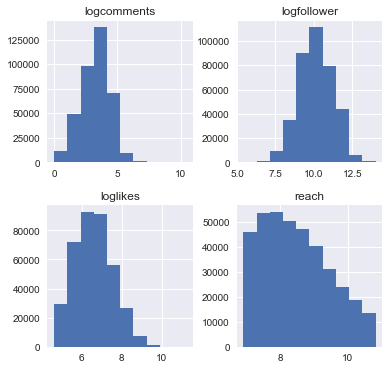

In [10]:
import numpy as np
data_log = pd.DataFrame([])
data_log["logfollower"] = np.log(df["followers"])
data_log["logcomments"] = np.log(df["comments"])
data_log["loglikes"] = np.log(df["likes"])
data_log["reach"] = np.log(df["reach"])
data_log.hist(figsize=[6,6])

# = data_pred["acceleration"]
# logdisp = data_log["logdisp"]
# loghorse = data_log["loghorse"]
# logweight = data_log["logweight"]

# # min-max
# scaled_acc = (acc-min(acc))/(max(acc)-min(acc))
# # Standardization
scaled_fol = (data_log["logfollower"]-np.mean(data_log["logfollower"]))/np.sqrt(np.var(data_log["logfollower"]))
# # mean normalization
# scaled_horse = (loghorse-np.mean(loghorse))/(max(loghorse)-min(loghorse))
scaled_com = (data_log["logcomments"]-np.mean(data_log["logcomments"]))/np.sqrt(np.var(data_log["logcomments"]))
# # Standardization
scaled_like = (data_log["loglikes"]-np.mean(data_log["loglikes"]))/np.sqrt(np.var(data_log["loglikes"]))
# scaled_weight= (logweight-np.mean(logweight))/np.sqrt(np.var(logweight))
scaled_reach = (data_log["reach"]-np.mean(data_log["reach"]))/np.sqrt(np.var(data_log["reach"]))


data_scaled = pd.DataFrame([])
data_scaled["logfollower"] = scaled_fol
data_scaled["logcomments"] = scaled_com
data_scaled["loglikes"] = scaled_like
data_scaled["reach"] = scaled_reach

# data_cont_scaled.hist(figsize  = [6, 6]);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c706bbe48>,
      dtype=object)

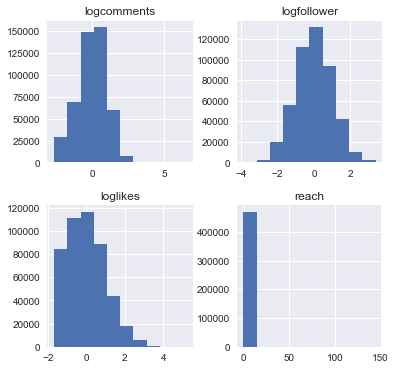

In [116]:
data_scaled.hist(figsize=[6,6])

In [117]:
data_log.head()

logfollower  logcomments  loglikes  reach
0    11.129789     0.000000  4.672829   1782
1    11.129789     0.000000  5.777652   8131
3    11.130537     2.484907  6.486161   9082
4    11.124494     3.258097  7.622664  85215
5    11.124878     4.143135  7.297768  36095

In [118]:
lr_model_3 = ols(formula='reach~logfollower + loglikes + logcomments', data=data_scaled).fit()

In [119]:
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  reach   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                 5.195e+04
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:06:44   Log-Likelihood:            -5.9934e+05
No. Observations:              469816   AIC:                         1.199e+06
Df Residuals:                  469812   BIC:                         1.199e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.145e-13      0.001  -4.07e-10      1.000      -0.002       0.002
logfollower     0.0620      0.002     31.864      0.000       0.058       0.066
loglikes        0.4585      0.002    202.140      0.000       0.454       0.463
logcomments    -0.0131      0.002     -8.152      0.000      -0.016      -0.010
==============================================================================
Omnibus:                  1346303.326   Durbin-Watson:                   0.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     311510226909.178
Skew:                          38.162   Prob(JB):                         0.00
Kurtosis:                    3991.397   Cond. No.                         3.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
def reach_test(followers, likes, comments):
    return (0.0620*followers) + (0.4585*likes) + (-0.0131*comments) -5.145e-13

In [121]:
1.302e+04

13020.0

In [124]:
reach_test(67812, 2044, 26)

5141.177399999999

In [125]:
reach_test(21463, 615, 26)

1612.3428999999994

In [ ]:
df[]